# Comparing NBA and Euroleague Basketball
# Part 3: Data Analysis

## Introduction

<a id='the_cell2'></a>

Basketball is one of the most popular sports in the world and it's easy to understand why: it involves a lot of scoring and its fast-paced tempo, paired with a rather straightforward set of rules, makes it accessible to a casual audience and exciting to watch. 

When talking about basketball, most people think about the NBA, the top league in the USA, which can count on some of the best players in the world. However, it is important to acknowledge that basketball is played professionally all around the world. Especially in Europe, this sport has deep solid roots and can count on a [long tradition](https://www.sports-fitness.co.uk/blog/growth-basketball-europe). In fact, many believe the level of competition there is comparable to the one of the NBA and, in [exhibition games](https://en.wikipedia.org/wiki/NBA_versus_EuroLeague_games#2010s) held during the off season, it's not unusual to see a European team beat an NBA squad.

The most important European basketball league is (very intuitively) called Euroleague. Unlike the NBA, where all franchises (except one) are American, teams from many different European countries participate in the Euroleague. Moreover, compared to the same 30 teams that are part of the NBA, only 16 to 18 different clubs compete in the Euroleague within a semi-open system; this means that, next to a slate of teams which return every year thanks to a special license, there are a few open slots assigned on merit according to the standings of each country's national league. Besides their format, the NBA and Euroleague also differ in some of their rules, from the size of the court to the actual in-game calls. The reader can refer to [this page](https://www.fiba.basketball/rule-differences) for an overview of these rule differences.   

---

In this project, we scrape, clean and analyze data referring to players and teams who played in the NBA or Euroleague between 2016 and 2020 (from now on, we will refer to the Euroleague using the acronym EL). We decided to focus on these 5 seasons because they are the only ones during which the EL adopted a system similar to the one used in the NBA: a regular season where each team plays each other and a postseason where the top seeded teams compete in a playoff tournament.  

The goal is to use the data to draw a comparison between the NBA and the EL, trying to highlight the aspects in which the two leagues might differ. In particular, we are interested in the following questions:

- What is the geographical composition of the NBA and the EL? In other words, what country (or, more generally, what continent) do the majority of players in each league come from?
- How do other biographical data compare across the two leagues? For example, do players in the NBA tend to be younger, taller or heavier than players in the EL?
- If we look at players' and teams' stats across the two leagues, do we observe any clear disparity? 
- Can we use the answers to the previous two questions to differentiate the styles of play in the NBA and in the EL? 
- Are there any specific factors that seem to contribute to the success of a team? If yes, are these factors the same in both leagues or do they change wildly?

This notebook only contains the data analysis portion of the project. At this stage, the data has already been scraped and cleaned. We will explore the datasets we have available using many different plots and, since we are running a comparative analysis, we will draw the NBA and EL data side by side to make it easier to study.  

# Analyzing Players' Data

Let's first work with the players' data. 

### A First Look at the Data

In [1]:
# Allow to run all code in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd

# Read the CSV file containing the players' data
players = pd.read_csv("final_DataFrames/player_stats_clean.csv")

In [3]:
# Allow display of all columns in a DataFrame
pd.set_option("display.max_columns", None)

# Take a look at the DataFrame
players

,Unnamed: 0,Player,Height,Weight,Nationality,Continent,Pos,Age,Team,GP,MP,FGM,FGA,FG%,3PM,3PA,3P%,2PM,2PA,2P%,eFG%,FTM,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,League
0,0,Álex Abrines,198,91,Spain,Europe,SG,23,Oklahoma City Thunder,68,15.5,5.2,12.9,0.393,3.6,9.3,0.381,1.5,3.6,0.426,0.543,1.5,1.8,0.898,0.8,2.6,3.4,1.5,1.3,0.3,1.3,4.4,15.5,2016,NBA
1,1,Quincy Acy,201,109,USA,Americas,PF,26,Brooklyn Nets,38,14.7,4.9,12.2,0.412,2.7,6.5,0.411,2.4,5.7,0.413,0.512,3.3,4.4,0.750,1.4,6.8,8.2,1.4,1.1,1.1,1.6,4.9,15.8,2016,NBA
2,2,Steven Adams,211,120,New Zealand,Oceania,C,23,Oklahoma City Thunder,80,29.9,6.3,11.0,0.571,0.0,0.0,0.000,6.3,11.0,0.572,0.573,2.7,4.3,0.611,4.7,5.6,10.3,1.5,1.5,1.3,2.4,3.2,15.1,2016,NBA
3,3,Arron Afflalo,196,95,USA,Americas,SG,31,Sacramento Kings,61,25.9,4.6,10.7,0.440,1.5,3.9,0.411,3.1,6.8,0.457,0.500,2.2,2.3,0.892,0.2,2.9,3.1,2.0,0.5,0.2,1.1,2.6,13.0,2016,NBA
4,4,Alexis Ajinça,218,112,France,Europe,C,28,New Orleans Pelicans,39,15.0,6.1,12.3,0.500,0.0,0.3,0.000,6.1,12.0,0.511,0.496,1.9,2.7,0.725,3.2,9.1,12.0,0.8,1.3,1.6,2.1,5.3,14.1,2016,NBA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3009,3009,Dejan Musli,213,110,Serbia,Europe,C,27,Brose Baskets Bamberg,24,16.6,8.0,13.5,0.587,0.0,0.0,0.000,8.0,13.5,0.589,0.593,4.8,7.2,0.631,3.9,8.0,11.6,2.4,0.5,0.7,2.9,3.1,20.5,2017,EL
3010,3010,Deon Thompson,203,113,USA,Americas,PF,28,Galatasaray,26,11.0,6.5,12.4,0.531,0.0,0.0,0.000,6.5,12.4,0.529,0.524,2.2,4.4,0.568,2.9,3.6,6.5,2.2,1.5,1.5,1.5,5.8,15.3,2016,EL
3011,3011,Kevin Punter,188,86,USA,Americas,SG,26,KK Crvena Zvezda,23,20.3,7.7,18.9,0.392,2.8,7.7,0.337,4.9,11.2,0.439,0.481,4.7,5.7,0.801,0.4,2.4,3.0,2.4,1.2,0.2,1.4,3.9,22.7,2019,EL
3012,3012,Leo Westermann,198,89,France,Europe,SF,28,Barca,24,11.6,4.1,10.7,0.386,2.4,6.6,0.361,1.7,4.1,0.417,0.495,1.4,1.4,0.861,0.3,4.8,5.2,6.9,1.4,0.0,4.1,6.2,12.1,2020,EL


In [4]:
# Drop the first column
players = players.iloc[:, 1:]

In [5]:
# Show all different years
players["Year"].unique()

array([2016, 2017, 2018, 2019, 2020], dtype=int64)

As we hinted in the introduction, the `players` DataFrame contains information about 3014 basketball players who played in the NBA or in the EL between 2016 and 2020. Thanks to the last two columns, it's easy to recognize the year and league each row refers to. Throughout the notebook, these categorical columns will be of great help to segment the data. In particular, setting `hue = "League"` when appropriate will allow us to quickly compare NBA and EL data.   

Among the other columns, a few of them contain the players' biographical data. These columns appear next to each other after the players' names and their content is pretty self-explanatory; it's enough to specify that heights are in cm and weights in kg (to see why we chose these units, check the data cleaning notebook). In the latter, we also went over the meaning of each of the statistical columns but, for the ease of the reader, we include a quick recap here as well:

`Pos`: player's playing position\
`GP`: number of games played\
`MP`: minutes averaged per game\
`FGM`, `FGA`, `FG%`: field goals made, attempted and field goals shooting percentage respectively (the latter is calculated as `FGM`/`FGA`)\
`3PM`, `3PA`,`3P%`: same as above but with 3-point shots instead\
`2PM`, `2PA`,`2P%`: same as above but with 2-point shots instead\
`eFG%`: effective field goal percentage (this is an adjusted shooting percentage which accounts for the fact that 3-point shots count for more than regular field goals; it is calculated as (`FGM` + 0.5 `3PM`)/`FGA`)\
`FTM`, `FTA`,`FT%`: same as above but with free throw shots instead\
`ORB`, `DRB`,`TRB`: offensive, defensive and total rebounds respectively\
`AST`: assists\
`STL`: steals\
`BLK`: blockshots\
`TOV`: turnovers\
`PF`: personal fouls\
`PTS`: points

It is important to highlight the fact that **all the stats that appear in the DataFrame are per 40-minutes**. This means that they describe the players' average game production pro-rated over 40 minutes. Normalizing the stats this way makes it possible to compare all players at once.

Before jumping into the actual analysis, it is a good idea to check how many data points we have available for each league.

<a id='the_cell'></a>

In [6]:
# Separate each league's segment
NBA_players = players[players["League"] == "NBA"]
EL_players = players[players["League"] == "EL"]

# Since we'll keep using these segments throughout the notebook, we organize them into a dictionary
players_segments = {"NBA" : NBA_players, "EL" : EL_players}

print("The number of NBA players' data points is: {}.".format(NBA_players.shape[0]))
print("The number of EL players' data points is: {}.".format(EL_players.shape[0]))

The number of NBA players' data points is: 2035.
The number of EL players' data points is: 979.


The NBA segment has roughly double as many observations as the EL one. This is consistent with the fact that more teams (hence more players) participate in the NBA than in the EL. We will keep this unbalance in mind when deciding what plots to use to visualize the data.

Let's fix some general variables that we will use throughout the notebook.

In [7]:
# Set up the years we track
years = list(players["Year"].unique())

# Set up the color palette following each league's logo predominant colors  
NBA_blue = "#1d428a"
EL_orange = "#ed7318"
league_colors = {"NBA" : NBA_blue, "EL" : EL_orange}

In [8]:
import matplotlib.pyplot as plt

# Set some default plot parameters we will use throughout the notebook
plt.rc('axes', titleweight = "bold")
plt.rc('xtick', labelsize=11)
plt.rc('ytick', labelsize=11)
plt.rc('legend', frameon = False)
plt.rc('figure', titleweight = "bold") 

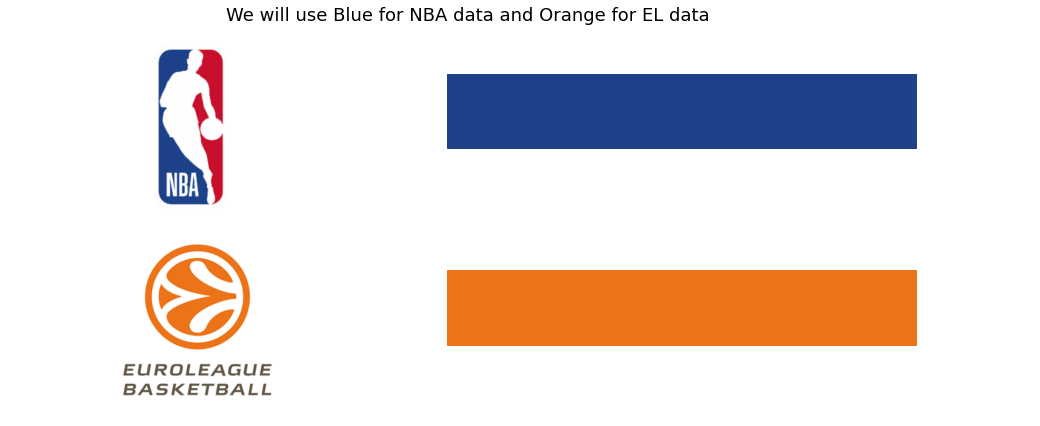

In [9]:
import matplotlib.patches as patches

# Read in the leagues' logos
NBA_logo = plt.imread("logos/NBA.png")
EL_logo = plt.imread("logos/EL.png")

# preliminary figure setting
fig, axs = plt.subplots(2, 2, figsize=(16,6))

# Draw logo and color of NBA data
axs[0][0].imshow(NBA_logo)
axs[0][1].add_patch(
    patches.Rectangle((0, 0.4), 0.8, 0.4, color = NBA_blue))

# Draw logo and color of EL data
axs[1][0].imshow(EL_logo)
axs[1][1].add_patch(
    patches.Rectangle((0, 0.4), 0.8, 0.4, color = EL_orange))

# general layout
for ax in axs.ravel():
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    
# Make title    
fig.suptitle("We will use Blue for NBA data and Orange for EL data", fontsize=18, weight = "normal")

# Adjust the figure layout spacing
plt.tight_layout()

# Show graphic
plt.show;

## Analyzing Players' Biographical Data

### Comparing Players' Nationalities

Let's start our analysis by considering the players' biodata. In particular, we want to visualize the 5 most represented countries in each league. We will render the data using a paired barplot for each of the seasons we track and, since we just saw the NBA and EL segments have different sizes, rather than each country's raw count we will use its normalized frequency; moreover, in an effort to increase the data-ink ratio, we will, here and throughout, **identify each season using only its starting year**.  

In [10]:
# Find the nationalities frequency table per year and league
top_countries = players.groupby(["Year", "League"])["Nationality"].value_counts(normalize = True).mul(100).rename(
    "percent")

# Reset index to create a column with all the countries
top_countries = top_countries.reset_index(2)

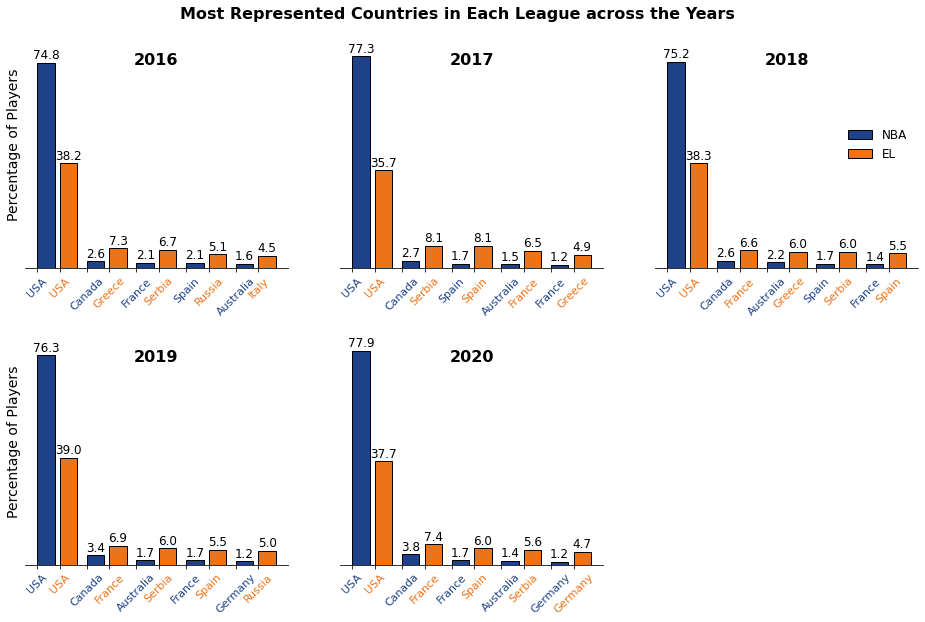

In [11]:
import numpy as np

# preliminary figure setting
fig = plt.figure(figsize = (16, 10))

# Initialize positional counter for placing the subplots for each year
i = 1

for year in years:
    
    # width of the bars
    barWidth = 0.35
 
    # Get the height and labels of the NBA bars
    NBA_bars = list(top_countries.loc[(year, "NBA"), "percent"].iloc[:5])
    NBA_labels = list(top_countries.loc[(year, "NBA"), "Nationality"].iloc[:5])
 
    # Get the height and labels of the EL bars
    EL_bars = list(top_countries.loc[(year, "EL"), "percent"].iloc[:5])
    EL_labels = list(top_countries.loc[(year, "EL"), "Nationality"].iloc[:5])
    
    # The x position of bars
    NBA_bars_pos = np.arange(len(NBA_bars))
    EL_bars_pos = [x + barWidth*1.3 for x in NBA_bars_pos]

    # The x position of the ticks. We adjust these positions manually to achieve the optimal readability of x-ticks labels 
    ticks_pos = np.array([[i, j] for i, j in zip(NBA_bars_pos, EL_bars_pos)]).ravel() 
    adjusted_ticks_pos = [a - barWidth/2  for a in ticks_pos]

    # The xticks labels
    xlabels = np.array([[i, j] for i, j in zip(NBA_labels, EL_labels)]).ravel() 

    # Instantiate the axis for the current year
    ax = fig.add_subplot(2, 3, i)    
    
    # Create NBA bars
    ax.bar(NBA_bars_pos, NBA_bars, width = barWidth, color = NBA_blue, edgecolor = "black", label="NBA")
 
    # Create EL bars
    ax.bar(EL_bars_pos, EL_bars, width = barWidth, color = EL_orange, edgecolor = "black", label="EL")
 
    # Create title of the current plot
    plt.title(year, y = 0.8, size = 16)

    # general layout
    plt.xticks(adjusted_ticks_pos, xlabels, rotation = 45)
    plt.yticks([])
    plt.ylim((0,90))
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)
    
    # Add the y-axis label only on the left-most plots (at the beginning of each row) 
    if i in [1, 4]:
        plt.ylabel("Percentage of Players", size = 14)
    
    # Add a legend on the right of third plot (at the end of thr first row)
    if i == 3: 
        plt.legend(loc = "center right", fontsize = 12)
    
    # Write the percentage on top of each bar
    for container in ax.containers:
        ax.bar_label(container, fontsize = 12, fmt = "%.1f", padding = 1)
        
    # Draw the x-ticks labels for the NBA data in blue    
    for tick in ax.get_xticklabels()[: :2]:
        tick.set_color(NBA_blue)
        
    # Draw the x-ticks labels for the EL data in orange    
    for tick in ax.get_xticklabels()[1: :2]:
        tick.set_color(EL_orange)    
    
    # Increase positional counter to draw next subplot
    i +=1

# Create title of the entire figure        
fig.suptitle("Most Represented Countries in Each League across the Years", size = 16, y = 0.9)
        
# Show graphic
plt.show();

It's immediately clear that **most of the players in both leagues are American**. Considering the size of the USA and the fact that basketball is very popular there, this fact is not surprising; furthermore, thanks to the college sports system, a large number of prospective players (mostly American) is produced every year and many of them are hired by professional teams both at home and abroad.

Looking at the numbers more closely, we can say that, **out of every four players in the NBA, three of them are American**; **in the EL**, altough the USA is still the most popular country, **this ratio is considerably lower** (it is on average slightly over one third). A logical explanation for this discrepancy is that many European national leagues, in an effort to cultivate local talent, enforce **[rules limiting the number of foreign players](https://www.reddit.com/r/Euroleague/comments/kr2ku9/foreign_player_restrictions_in_domestic_leagues/)** a team is allowed to have.

In fact, looking at the **other most represented countries in the EL**, we notice that **the same handful of European nations appears each year**. Given what we said above, it makes sense these are some of the countries with the highest number of teams possessing a EL license. The only exception is France which only had one team participating in the EL once in the span of time we are considering (ASVEL Basket in the 2019-2020 season). Nervertheless, **some of the same European countries** (including France) **also appear consistently in the NBA top 5 list**; this is a sign that such countries are basketball strongholds which are able to develop players highly valued both at home and overseas.

Finally, we observe that **Canada and Australia always appear in the NBA top 5 but never in the EL top 5**. Canada in particular is always the second most popular nation in the NBA. This result is most likely influenced by the presence of a Canadian franchise in the NBA, the Toronto Raptors.

Let's now measure how "international" each league is by checking how many different countries one can find.

In [12]:
# Count the number of unique countries in each league during each year
countries_count = players.groupby(["League", "Year"]).nunique()["Nationality"].reset_index()

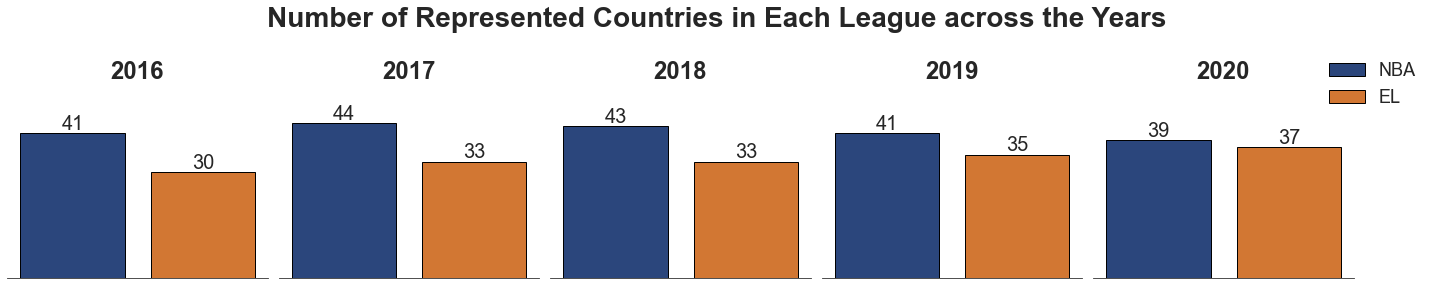

In [13]:
import seaborn as sns

sns.set_style("white");

# Create the plots with FacetGrid
g = sns.FacetGrid(data = countries_count, col = "Year", hue = "League", palette = league_colors,
                  hue_order = ["NBA", "EL"], height = 4)
figure = g.map_dataframe(sns.barplot, x = "League", y = "Nationality", order = ["NBA", "EL"],
                          edgecolor = "black")

# general layout
g.set(xlabel = "", ylabel = "", xticks = [], yticks = [], ylim = (0, 55))

# Customize each facet individually
axs = figure.axes.flatten()
for ax in axs:
    ax.spines["left"].set_visible(False)
    
    # Add height on top of each bar
    for container in ax.containers:
        ax.bar_label(container, fontsize = 20)

# Add legend to the right of the last plot
axs[4].legend(loc = "upper right", fontsize = 18, bbox_to_anchor = (1.3, 1.2))

# Format title of each single facet
g.set_titles(col_template="{col_name}", size = 24)

# Make title of entire figure 
figure.fig.suptitle("Number of Represented Countries in Each League across the Years", size = 28);

# Adjust the figure layout spacing
figure.fig.tight_layout()

# Show graphic
plt.show();

We find that **more countries are represented in the NBA than in the EL**, regardless of the year. This can be considered surprising since we saw that about 75% of NBA players comes from a single country (the USA). However, we have to keep in mind that the NBA data we are using is double as much as the EL one. Moreover, it is interesting to see how **the gap has really reduced over the last couple of years**.  

### Comparing Continents Representation

Rather than considering individual countries, we also want to take advantage of the `Continent` column to obtain a coarser picture of the geographical composition of each league. We will again use paired barplots showing the normalized frequency of each continent.

In [14]:
# Find the continents frequency table per year and league
continent_counts = players.groupby(["Year", "League"])["Continent"].value_counts(normalize = True).mul(100).rename("percent")

# Establish order in which continents will appear. We follow the NBA descending order during the first year we track  
continents_order = continent_counts.loc[(years[0], "NBA")].index

# Reset index to create columns to use in the plot
continent_counts = continent_counts.reset_index()

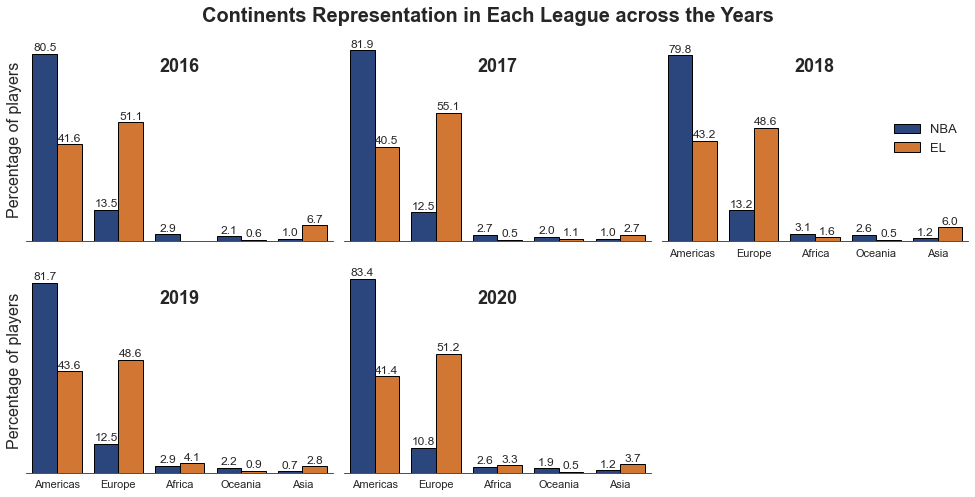

In [15]:
# Create the plot with FacetGrid
g = sns.FacetGrid(continent_counts, col = "Year", height=3.5, aspect=1.3, col_wrap = 3)
figure = g.map_dataframe(sns.barplot, x = "Continent", y = "percent", hue = "League", order = continents_order,
                hue_order = ["NBA", "EL"], palette = league_colors, edgecolor = "k")

# general layout
g.set_axis_labels("", "Percentage of players", size = 16)
g.set(yticks = [])


# Customize each facet individually
for ax in figure.axes:
    ax.spines["left"].set_visible(False)
    
    # Add percentage on top of each bar
    for container in ax.containers:
        ax.bar_label(container, fontsize = 12, fmt = "%.1f", padding = 1)

# Add legend on the right of the third subplot (the last one in the first row)
figure.axes[2].legend(loc = "center right", fontsize = 13)        
        
# Format title of each facet
g.set_titles(col_template="{col_name}", size = 18, y = 0.8)    
    
# Create title of entire figure         
plt.suptitle("Continents Representation in Each League across the Years", size = 20)

# Adjust the figure layout spacing
figure.fig.tight_layout()

# Show graphic
plt.show();

Unsurprisingly, **the Americas is by far the most represented continent in the NBA** (remember the overwhelming presence of US players). Moreover, considering the roster limitation rules we talked about, it is also not surprising to see that **European players in the EL**, when considered as a single group, **outnumber American players**. 

All other continents come way behind of the Americas and Europe in both leagues and, taken individually, none of them reaches 5% of the players. The only exception is Asia in 2016 and 2018 in the EL. In fact, **Asian players appear to be fairly more popular in the EL rather than in NBA**. On the other hand, **players from Oceania are more present in the NBA than in the EL**. This confirms what we saw about the disparity of the Australian quota between the two leagues.

Finally, Africa is consistenly the third most represented continent in the NBA (even though, given the very slim percentage margin, we are talking of just a few extra players) and it's interesting to notice a **steady increase of African players in the EL**: they went from no player at all in 2016 to a peak of 4.1% in 2019.

### Visualizing Players' Age Distributions

Let's now take a look at the rest of the biodata columns we have available. We start by comparing the players' age distributions using split violin plots.

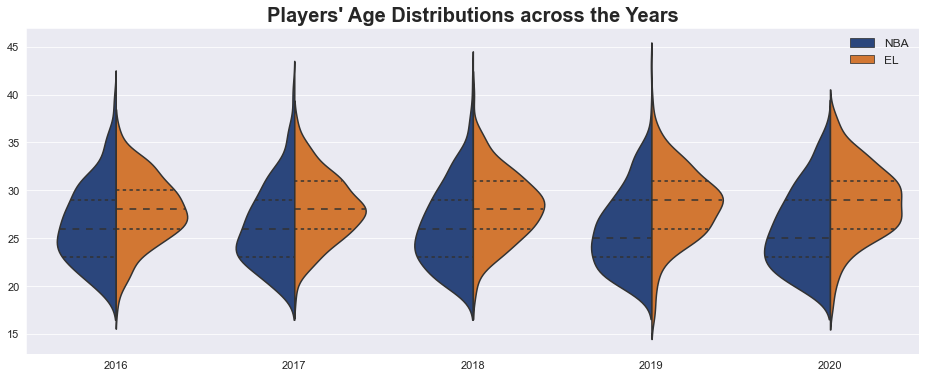

In [16]:
# preliminary figure settings
sns.set_style("darkgrid")
fig = plt.figure(figsize = (16,6))

# Draw the violinplots and show the distributions' quartiles inside of them 
plot = sns.violinplot(data=players, x="Year", y="Age", hue="League", split = True, inner = "quart", palette = league_colors)

# general layout
plot.set(xlabel = "", ylabel = "")
plt.legend(fontsize = 12)

# Make the title
plt.title("Players' Age Distributions across the Years", size = 20);

It seems like the players' age distribution for both leagues hasn't changed much across the years. However, while the EL data looks overall more normally distributed, the NBA density curves for the last couple of years feature a light positive skewness. More significantly, with the help of the quartiles inside each violin, we can clearly see that the blue distribution always accumulates to the left of the orange one; in fact, the EL median age is consistenly above the NBA median to the point that, in 2019 and 2020, it actually reached the NBA upper quartile. We conclude that **NBA players are generally younger than the ones in the EL**. To quantify this difference, we can say that on average **half of the NBA players are younger than 26 while in the EL this threshold increases to 29 years old**. 

One possible explanation for this age gap is that the EL is only one, albeit the top, among many other basketball competitions in Europe; hence, **young players might need to spend a few years establishing themselves playing in lower-tier leagues before being called up by a EL team**. On the other hand, in the USA, besides the NBA there is really no other professional organization; thus, it is more common for players to be pushed to the main stage at a young age.

### Visualizing Players' Height and Weight Distributions

Let's now look at the distributions of the `Height` and `Weight` columns using more violinplots.

<a id='the_graph2'></a>

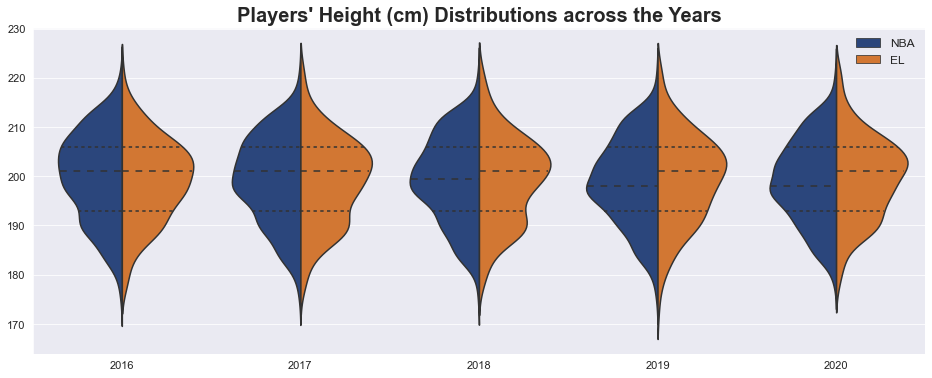

In [17]:
# preliminary figure settings
fig = plt.figure(figsize = (16,6))

# Draw the violinplots and show the distributions quartiles inside of them 
plot=sns.violinplot(data=players, x="Year", y="Height", hue="League", split = True, inner = "quart", palette = league_colors)

# general layout
plot.set(xlabel = "", ylabel = "")
plt.legend(fontsize = 12)

# Add title
plt.title("Players' Height (cm) Distributions across the Years", size = 20);

Even in this case the distributions do not change drastically over the years. Compared to the ages, however, **the values between the two leagues are not so unbalanced this time** and, in fact, both density curves maintain the same upper and lower quartiles throughout. 

Nonetheless, we do observe a slight negative trend (players getting shorter) in the **NBA distribution** witnessed by a **slight decrease of the median height starting from 2018**. Furthermore, we also notice the appereance of a small bump right below the lower quartile of the EL density plot (a cluster of shorter players).

Right now it's hard to tell whether these trends are fortuitous or if, instead, they are a sign that the playing style has changed and now favors shorter players. Going further and looking at more data, we might be able to get additional insights on this issue.

<a id='the_graph3'></a>

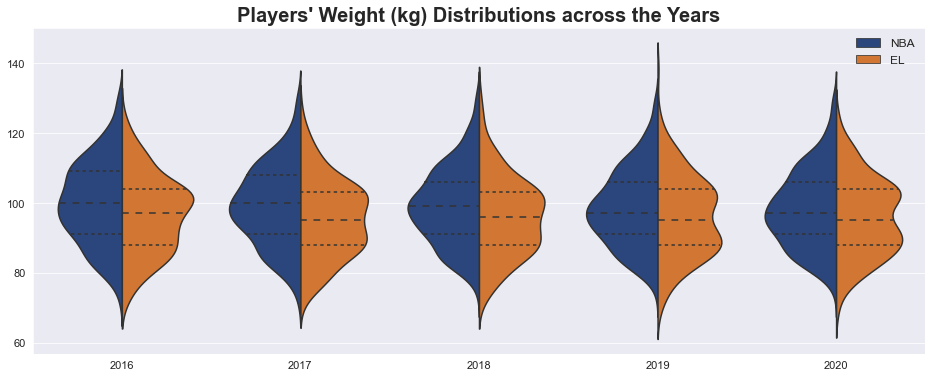

In [18]:
# preliminary figure settings
fig = plt.figure(figsize = (16,6))

# Draw the violinplots and show the distributions quartiles inside of them 
plot=sns.violinplot(data=players, x="Year", y="Weight", hue="League", split = True, inner = "quart", palette = league_colors)

# general layout
plot.set(xlabel = "", ylabel = "")
plt.legend(fontsize = 12)

# Add title
plt.title("Players' Weight (kg) Distributions across the Years", size = 20);

The discrepancy between the quartiles shows that **NBA players are on average heavier than players in the EL**, even if the difference is only of a few kilos. We suppose this might affect the level of physicality and intensity of games in the two leagues. 

Talking about the shape of the distributions, it's interesting to notice how the blue curves are almost perfectly symmetrical while the orange ones appear more and more bimodal through the years, with peaks forming around the upper and lower quartiles. It's honestly hard to make sense of this phenomenon. We can observe, however, that **in 2019 both league's players' median weight decreased slightly**. The time window is consistent with what we observed above for the players' heights and **might be another hint that, over the last couple of years, the playing style has actually changed and teams have started to hire smaller players**.

## Analyzing Players' Statistical Data

We now focus on the players statistical data. We gave a quick overview of the stats appearing in the `players` DataFrame when we first loaded the CSV file. Since these stats make up the majority of the data we have available, we stop displaying the time dimension given by the `Year` column; moreover we will visualize the distributions using kernel density curves and adding a vertical line at the location of the median. This methodology allows us to keep the number of plots reasonable while, at the same time, obtaining graphics that are easy to compare.

In the next cell we define a function that plots distributions in the way we just described. We will call this function repeatedly throughout the rest of the notebook and, since we will use it for teams' distributions too, we include a parameter that allows to choose between players' and teams' stats.

In [19]:
def draw_kde(ax, league, stat, stat_type, tresh = "min"):
    """
    Plot a segment of the distribution of one of the players' or teams' stats.
    The distribution is drawn using a kernel density plot with a vertical line located in correspondence of the median.
    
    :param ax: the axis to draw on
    :type ax: matplotlib.axes.Axes 
    :param league: specifies whether to draw NBA or EL data
    :type league: "NBA" | "EL"
    :param stat: the stat whose distribution we want to visualize.
                 Must correspond to one of the columns in the `players` or `teams` DataFrames.
    :type stat: str
    :param stat_type: specifies whether to draw players' or teams' stats
    :type stat_type: "players" | "teams"
    :param tresh: a lower threshold to establish what portion of the distribution to plot.
                  - "min": plot the entire distribution
                  - "25%": plot the top 75% of the distribution
                  - "50%": plot the top half of the distribution
                  - "75%": plot the top 25% of the distribution
                   Defaults to "min"
    :type tresh: str, optional.
    
    :return: the axis with the plot to allow additional customization
    """
    # Gather the data to plot
    if stat_type == "players":
        data = players_segments[league]
        data_segment = data.loc[data[stat] >= data[stat].describe()[tresh]]
    else:
        # We will introduce the teams DataFrames for each league in a little bit
        data = teams_segments[league]
        data_segment = data.loc[data[stat] >= data[stat].describe()[tresh]]
    
    # Pick the color following the leagues palette 
    color = league_colors[league]
    
    # Draw the kde plot
    plot = sns.kdeplot(data = data_segment, x = stat, color = color, ax = ax)
    
    # Get the equation of the kde curve (this wouldn't be possible if we set shade = True in the line above)
    kdeline = plot.lines[0]
    xs = kdeline.get_xdata()
    ys = kdeline.get_ydata()
    
    # Draw the vertical line in correspondence of the median. np.interp() gets the height of the kde curve at the median.
    # We use this height to make sure the vertical line doesn't extend above the kde curve. 
    median = round(data_segment[stat].median(), 1)
    height = np.interp(median, xs, ys)
    plot.vlines(median, 0, height, color="magenta", ls= ":", label = "median")
    
    # Shade the area under the kde curve
    plot.fill_between(xs, 0, ys, facecolor=color, alpha=0.2)
    
    return plot

### Comparing Players' Points Distributions

Points are arguably the most important stat in basketball (after all, to win games you need to score more points than your opponent); therefore, it makes sense to first look at the distributions of the `PTS` column.

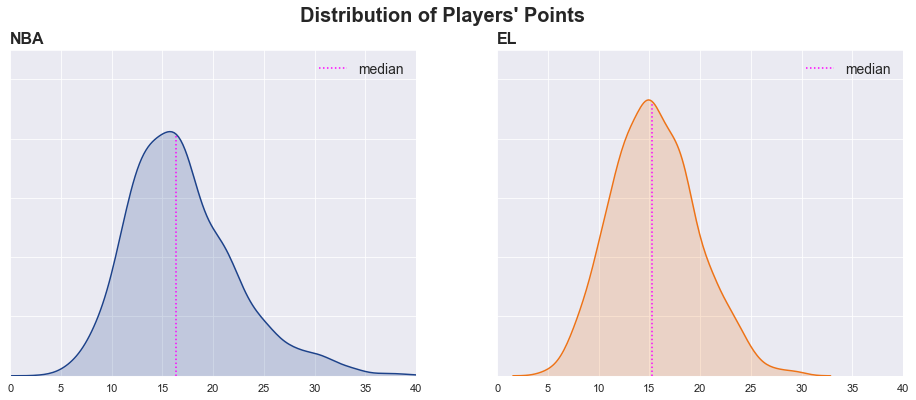

In [20]:
# preliminary figure settings
fig, axs = plt.subplots(1, 2, figsize = (16, 6))

# Draw the density distributions side by side
NBA_plot = draw_kde(axs[0], "NBA", "PTS", "players")
EL_plot = draw_kde(axs[1], "EL", "PTS", "players")

# Remove axis labels, uniformize axis limits to facilitate comparison and draw the legend
for ax in axs:
    ax.set(xlabel = "", ylabel = "", yticklabels = [], xlim = (0, 40), ylim = (0, 0.11))    
    ax.legend(fontsize = 14)
    
# Set the titles of each single subplot    
NBA_plot.set_title("NBA", fontsize = 16, loc = "left")    
EL_plot.set_title("EL", fontsize = 16, loc = "left")  


# Set the tile of the entire figure
fig.suptitle("Distribution of Players' Points", fontsize = 20);

Both distribution have a bell shape and have medians which are just above 15 points. However, while the EL curve is almost perfectly symmetrical, the NBA one shows a light positive skew. In fact, the blue distribution has a longer tail which is still pretty sizable past the 25 points mark. More accurately, the blue tail extends all the way to 40 points while the orange one dies right after 30 points. 

We infer that, compared to the EL, points are less evenly distributed among players **in the NBA**; instead, **there exists an elite group of scorers who make** a lot of points (25+), **more points than the quasi-totality of players in the EL**.

To get an even better picture of this scenario we are painting, we visualize next the number of top scorers in each league. We distinguish this category of players by using an increasing threshold of points that they need to reach. Moreover, as we have already done before, raher than raw counts we consider normalized frequencies.     

In [21]:
# Choose reasonable points thresholds judging from the graphs above
thresholds = np.arange(20, 40, 5)

In [22]:
# Create a DataFrame with the normalized count of top scorers in the NBA
NBA_top_scorers = pd.DataFrame({"League" : "NBA", "threshold" : thresholds})
NBA_top_scorers["percentage"] = [NBA_players[NBA_players["PTS"] >= thresh].shape[0]/NBA_players.shape[0] * 100
                         for thresh in thresholds]
# Create a DataFrame with the normalized count of top scorers in the EL
EL_top_scorers = pd.DataFrame({"League" : "EL", "threshold" : thresholds})
EL_top_scorers["percentage"] = [EL_players[EL_players["PTS"] >= thresh].shape[0]/EL_players.shape[0] * 100
                         for thresh in thresholds]

In [23]:
# Combine the data into a single DataFrame
top_scorers = NBA_top_scorers.append(EL_top_scorers).reset_index()

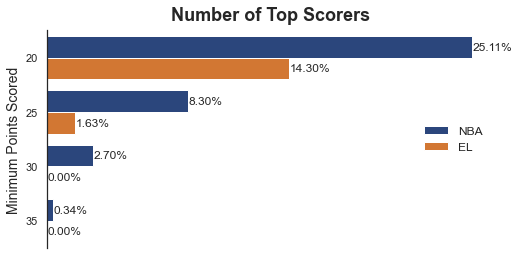

In [24]:
# preliminary figure settings
sns.set(style = "white")
fig = plt.figure(figsize = (8,4))

# Plot the data using horizontal paired barplots
plot = sns.barplot(data = top_scorers, x = "percentage", y = "threshold", hue = "League", orient="h", palette = league_colors)

# general layout
plot.spines["right"].set_visible(False)
plot.spines["top"].set_visible(False)
plot.spines["bottom"].set_visible(False)
_ = plot.set(xlabel = "", xticklabels = [])
_ = plot.set_ylabel("Minimum Points Scored", size = 14)

# Add percentage at the end of each bar
for container in plot.containers:
    _ = plot.bar_label(container, fontsize = 12, fmt = "%.2f%%", padding = 1)

# Create legend    
_ = plot.legend(loc = "center right", fontsize = 12)

# Make title
_= plt.title("Number of Top Scorers",
          fontsize = 18, pad = 10)

The graph above confirms what we had already speculated: **the NBA has a much higher density of top scorers** (players who score a lot of points) **compared to the EL**. We will get back to this topic later, when we start using the teams' stats. For now we are happy with this information and we move on.

### Comparing other Players' Stats

Let's have a look at the rest of the stats we have available. Unlike Points, most of these stats are specific and are usually territory of only a few specialists; hence it is a good idea to **display only the top half segment of each league**, that is, we only consider those players with a production higher than the median.    

We first lay out what we call the "forward stats", i.e., those stats that usually pertain to tall players who play close to the basket. Since in the next step we will draw the same exact figure for the remaining stats, we include the plotting code inside of a function.

In [25]:
def draw_both_leagues_kde(stats, stat_type, tresh = "min"):
    """
    Plot a segment of both leagues' distributions of players' or teams' stats.
    The distributions are drawn using the dra_kde() function and are arranged in two columns:
    the first column shows the NBA plots while the second column shows the corresponding EL plots. 
    
    :param stats: a collection of stats whose distributions we want to visualize. 
                  Must match columns in the `players` or `teams` DataFrame.
    :type stats: list 
    :param stat_type: specifies whether to draw players' or teams' stats
    :type stat_type: "players" | "teams"
    :param tresh: a lower threshold to establish what portion of the distribution to plot.
                  - "min": plot the entire distribution
                  - "25%": plot the top 75% of the distribution
                  - "50%": plot the top half of the distribution
                  - "75%": plot the top 25% of the distribution
                   Defaults to "min"
    :type tresh: str, optional.
    
    :return: the figure and all the axis with the plots to allow additional customization
    """ 
    
    # preliminary figure setting
    fig, axs = plt.subplots(len(stats), 2, figsize = (16, 6))
    row_range = range(0, len(stats))

    for (stat, row_index) in zip(stats, row_range):

        # Plot the NBA distributions on the first column
        NBA_plot = draw_kde(axs[row_index][0], "NBA", stat, stat_type, tresh = tresh)
        # Plot the EL distributions on the second column
        EL_plot = draw_kde(axs[row_index][1], "EL", stat, stat_type, tresh = tresh)

        # Establish common x_max and y_max values to draw plots in scale
        x_max = max(NBA_plot.get_xlim()[1], EL_plot.get_xlim()[1])
        y_max = max(NBA_plot.get_ylim()[1], EL_plot.get_ylim()[1])

        #        y_max = max(axs[row_index][0].get_ylim()[1], axs[row_index][1].get_ylim()[1])

        # general layout
        NBA_plot.set_ylabel(stats[row_index], rotation = 0, fontsize = 14, weight = "bold", labelpad = 15);
        NBA_plot.set(xlabel = "", yticklabels = [], xlim = (0, x_max), ylim = (0, y_max));   
        EL_plot.set(ylabel = "", xlabel = "", yticklabels = [], xlim = (0, x_max), ylim = (0, y_max));

        # Identify the NBA and EL subplots by putting a title at the top of each columns
        if row_index == 0:
            NBA_plot.set_title("NBA", fontsize = 16, loc = "left");    
            EL_plot.set_title("EL", fontsize = 16, loc = "left");

    return fig, axs    

In [26]:
# Select the stats to plot
forward_stats = ["ORB", "DRB", "BLK"] 

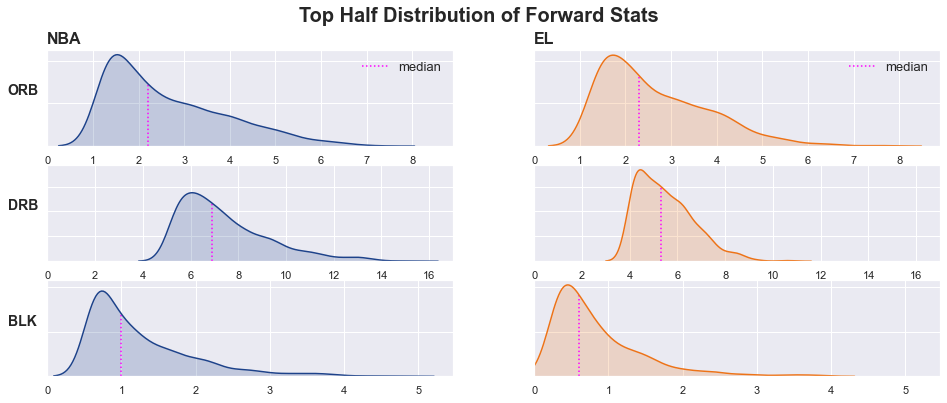

In [27]:
sns.set_style("darkgrid")

# Plot the forward stats distributions
fig, axs = draw_both_leagues_kde(forward_stats, "players", tresh = "50%")

# Draw the legend on the first plot of each column 
axs[0][0].legend(fontsize = 13)
axs[0][1].legend(fontsize = 13)


# Set the title of the entire figure        
fig.suptitle("Top Half Distribution of Forward Stats", fontsize = 20);

The curves for the Offensive Rebounds are almost identical. Yet, the NBA distribution for Defensive Rebounds has a larger range, a longer (positive) tail and a higher median (about 1 unit) than the EL counterpart. We have a similar situation for the Blockshots column but this time the values' discrepancy is even smaller.     

As of now, the picture above doesn't offer much insight; we better wait until we look at the corresponding teams' data. For sake of completeness, however, let's also display the distributions of the players' "guard stats", i.e., those stats that usually pertain shorter players who spend a good portion of their time away from the basket.

In [28]:
# Select the stats to plot
guard_stats = ["AST", "STL", "TOV"] 

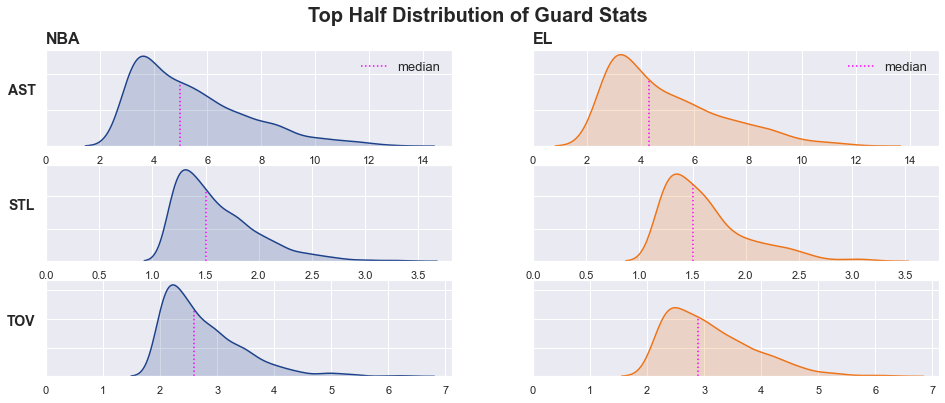

In [29]:
# Plot the guard stats distributions
fig, axs = draw_both_leagues_kde(guard_stats, "players", tresh = "50%")

# Draw the legend on the top plot of each column 
axs[0][0].legend(fontsize = 13)
axs[0][1].legend(fontsize = 13)

# Set the title of the entire figure        
fig.suptitle("Top Half Distribution of Guard Stats", fontsize = 20);

Even in this case we do not observe any striking contrast worth a remark.

### What Makes a Good Scorer?

Besides visualizing the distributions of the players' stats, we are also interested in understanding how these stats relate to each other. In fact, this could help us understand what are the main factors that make a player successful. More generally, by comparing the correlation coefficients of the NBA and EL data, we might be able to recognize aspects of the game that are more predominat in one league rather than the other.   

Since we've already elected Points as the "main stat", for now let's only check the correlation of `PTS` with some of the other columns. Later, when working with teams' data, we will explore these correlations further using scatterplots and regression lines (intuitively, the teams' data will have fewer observations so it will be easier to avoid overplotting). 

In [30]:
# Collect the columns to correlate
cols = ["FGA", "FG%", "2PA", "2P%", "3PA", "3P%", "eFG%", "FTA", "FT%", "TRB", "AST", "STL", "PTS"]

In [31]:
# Find the NBA correlations coefficients (making sure to leave out the trivial `PTS`-`PTS` correlation)
NBA_corr = NBA_players[cols].corr()["PTS"].sort_values(ascending = False).iloc[1:].rename("corr")

# Find the EL correlations coefficients (making sure to leave out the trivial `PTS`-`PTS` correlation)
EL_corr = EL_players[cols].corr()["PTS"].sort_values(ascending = False).iloc[1:].rename("corr")

# Insert a `League` column (we will use this as the hue parameter in the plot we'll draw)
NBA_corr = NBA_corr.to_frame()
NBA_corr["League"] = "NBA"
EL_corr = EL_corr.to_frame()
EL_corr["League"] = "EL"

# Combine the two DataFrames into one
corr = NBA_corr.append(EL_corr)

<a id='the_graph'></a>

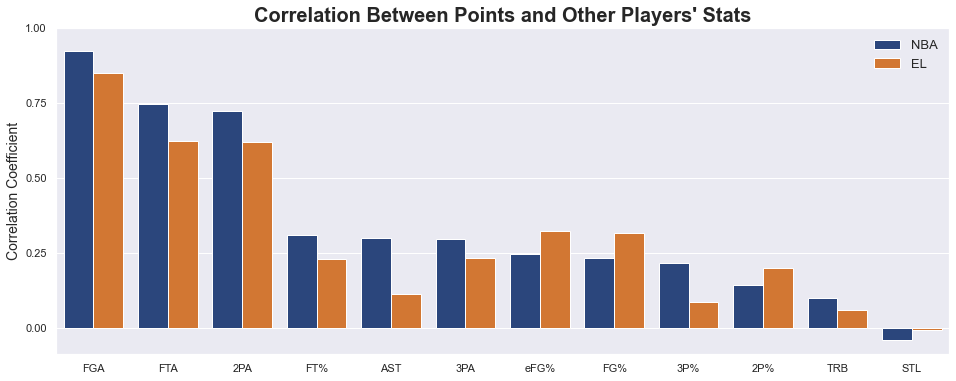

In [32]:
# preliminary figure settings
fig = plt.figure(figsize = (16, 6))

# Visualize the correlation coefficients using paired barplots
plot = sns.barplot(data = corr, x = corr.index, y = "corr", hue = "League", palette = league_colors)
_ = plot.set(yticks = np.arange(0, 1.25, 0.25))
_ = plot.set_ylabel(ylabel = "Correlation Coefficient", size = 14)

# Draw legend
_ = plt.legend(fontsize = 13)

# Make title
_ = plt.title("Correlation Between Points and Other Players' Stats", fontsize = 20)

It's obvious how to make sense of the **strong correlation between Points and Field Goal Attempts**: the more shots you attempt, the more you make, the more points you score. We can apply the same argument to comment the correlations with Free Throw and 2-Point Shot Attempts since these categories are both directly related to Field Goals (players are awarded free throws when they are fouled in the act of shooting).
   
Besides what we covered above, however, there's really **no strong correlation that stands out**. This suggests that basketball is an all-round, multifaceted sport for which it is **hard to pinpoint an exclusive skill that would make players good scorers**. Nervertheless, it is interesting to notice how the Shooting Percentages too do not seem to relate to points; this is a clear sign that, doesn't matter at what level and where basketball is played, **it is very hard to have outstanding scoring averages by also keeping high shooting percentages** (in fact, a 50-FG%, 40-3P%, 90-FT% stat line is already considered elite and guarantees you entry in an [exclusive club](https://en.wikipedia.org/wiki/50%E2%80%9340%E2%80%9390_club)).         

# Analyzing Teams' Data

Let's now work with the table containing teams' data. Generically speaking, our goal is to collect additional evidence to investigate further some of the speculations we made looking at the players' data.

### A First Look at the Data

In [33]:
# Read the CSV file containing the teams' data
teams = pd.read_csv("final_DataFrames/team_stats_clean.csv")

In [34]:
# Take a look at the DataFrame
teams

,Unnamed: 0,Team,GP,FGM,FGA,FG%,3PM,3PA,3P%,2PM,2PA,2P%,FTM,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,League,W/L%
0,0,Golden State Warriors,82,35.9,72.6,0.495,10.0,26.0,0.383,25.9,46.5,0.557,14.8,18.8,0.788,7.8,29.2,37.0,25.3,8.0,5.7,12.3,16.1,96.6,2016,NBA,0.542
1,1,Houston Rockets,82,33.6,72.7,0.462,12.0,33.6,0.357,21.6,39.1,0.552,16.9,22.1,0.766,9.1,27.9,37.0,21.0,6.8,3.6,12.6,16.6,96.1,2016,NBA,0.236
2,2,Denver Nuggets,82,34.3,73.1,0.469,8.8,24.0,0.368,25.5,49.1,0.519,15.6,20.2,0.774,9.8,28.8,38.7,21.1,5.8,3.2,12.5,15.9,93.1,2016,NBA,0.653
3,3,Cleveland Cavaliers,82,33.2,70.8,0.470,10.8,28.2,0.384,22.4,42.5,0.528,14.6,19.4,0.748,7.8,28.7,36.4,18.9,5.5,3.3,11.4,15.1,91.9,2016,NBA,0.306
4,4,Washington Wizards,82,34.4,72.5,0.475,7.7,20.7,0.372,26.8,51.9,0.515,14.4,18.4,0.784,8.6,27.2,35.8,19.9,7.1,3.4,11.8,17.8,91.0,2016,NBA,0.472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,229,Khimki,34,27.5,62.2,0.442,9.3,26.8,0.346,18.2,35.4,0.514,13.2,16.3,0.810,7.5,20.8,28.3,18.2,7.0,3.3,13.9,22.1,77.5,2020,EL,0.118
230,230,Zenit Saint Petersburg,39,27.2,56.7,0.480,9.2,24.5,0.375,18.0,32.2,0.559,13.8,17.4,0.792,7.7,20.5,28.1,17.5,6.0,2.0,12.2,20.9,77.5,2020,EL,0.588
231,231,Zalgiris,34,28.4,58.5,0.486,8.4,20.0,0.421,20.0,38.5,0.519,11.9,14.1,0.840,8.1,20.7,28.8,18.3,6.4,1.1,13.3,19.4,77.4,2020,EL,0.500
232,232,ASVEL Basket,34,27.4,57.9,0.474,8.4,21.4,0.393,19.0,36.5,0.521,13.3,17.2,0.774,7.3,20.8,28.1,16.4,6.6,3.2,14.5,21.5,76.7,2020,EL,0.382


In [35]:
# Drop the first column
teams = teams.iloc[:, 1:]

As we can see, the table above contains the same statistical columns that appear in the `players` DataFrame. Reasonably, this time we don't have any geographical or biographical data (this kind of information doesn't really apply to teams). Nevertheless, all the way to the right, we find a useful `W/L%` column which shows the Winning Percentage of each team (calculated as the ratio of of games won to games played).    

The next block of code is analogous to [this cell](#the_cell) and serves the same purpose.  

In [36]:
# Separate each league's segment
NBA_teams = teams[teams["League"] == "NBA"]
EL_teams = teams[teams["League"] == "EL"]

# Since we'll keep using these segments throughout the notebook, we organize them into a dictionary
teams_segments = {"NBA" : NBA_teams, "EL" : EL_teams}

print("The number of NBA teams' data points is: {}.".format(NBA_teams.shape[0]))
print("The number of EL teams' data points is: {}.".format(EL_teams.shape[0]))

The number of NBA teams' data points is: 150.
The number of EL teams' data points is: 84.


As expected we do have more NBA than EL data.

### Visualizing Teams' Top Scorer Relevance

Before we dive into the analysis of the teams' statistical data, let's link back to an issue we have already exposed: the imbalance in the number of top scorers in the NBA and in the EL.  

Recall that, compared to the EL data, the distribution of Points among NBA players has more and higher outliers, i.e., players who score a large number of points (say, at least 25 points per 40-minutes). Assuming these players are spread among all teams, **we hypothesize that, more acutely in the NBA than in the EL, each team's points production is not evenly shared among all teammates and, instead, is concentrated into a single (or a few) players**.  

We put this hypothesis to test by tracking each team's total points and checking how much of it (in percentage) comes from the team's top scorer. We draw this data using lollipop plots (one lollipop for each team) and, to guarantee a better layout, we consider each year separately. If our inference is correct, we'll observe much taller stems for the NBA teams than the EL teams. Before plotting the data, however, we need to renormalize the players' and teams' points, turning the per 40-minutes values back into the actual per game averages.

In [37]:
# Create a DataFrame with the players' points per game
players_per_game = players[["Player", "Team", "MP", "PTS", "Year", "League"]].copy()
players_per_game["PTS"] = players_per_game["PTS"].divide(40).multiply(players_per_game["MP"], axis = "index")

# Round the points to 1 decimal digit
players_per_game["PTS"] = round(players_per_game["PTS"], 1)

In [38]:
# Find each team's top scorer in each season
team_groups = players_per_game.groupby(["Team", "Year"]) 
teams_top_scorer = team_groups.apply(lambda x: x.sort_values("PTS", ascending = False).iloc[0])

teams_top_scorer.head(5)

Player                      Team  \
Team                     Year                                               
ALBA Berlin              2019  Rokas Giedraitis               ALBA Berlin   
                         2020   Marcus Eriksson               ALBA Berlin   
ASVEL Basket             2019     Adreian Payne              ASVEL Basket   
                         2020       Norris Cole              ASVEL Basket   
AX Armani Exchange Milan 2016     Rakim Sanders  AX Armani Exchange Milan   

                                 MP   PTS  Year League  
Team                     Year                           
ALBA Berlin              2019  27.0  13.8  2019     EL  
                         2020  23.3  12.4  2020     EL  
ASVEL Basket             2019  18.2  10.5  2019     EL  
                         2020  26.3  13.7  2020     EL  
AX Armani Exchange Milan 2016  22.8  12.5  2016     EL

In [39]:
# Drop the index (that information is already contained in the DataFrame)
teams_top_scorer = teams_top_scorer.reset_index(drop = True)

# Rename the `PTS` column to avoid conflict with the same column in the `teams` DataFrame
teams_top_scorer.rename(columns = {"Player" : "Top Scorer", "PTS" : "Top Scorer PTS"}, inplace = True)

In [40]:
# Create a DataFrame with the teams' points per game
teams_per_game = teams[["Team", "PTS", "Year", "League"]].copy()

# This time the denormalization formula is easier and only involves NBA data
teams_per_game.loc[teams_per_game["League"] == "NBA", "PTS"] = teams_per_game.loc[teams_per_game["League"] == "NBA",
                                                                                  "PTS"].divide(40).multiply(48)

In [41]:
# Add the top scorers info to the `teams` DataFrame and assign the result to a new variable
teams_and_scorer = teams_per_game.merge(teams_top_scorer, on = ["Team", "Year", "League"], how = "inner")

# Make sure the inner merge went right
teams_top_scorer.shape[0] == teams_and_scorer.shape[0]
teams_top_scorer.shape[0] == teams.shape[0]
teams_and_scorer.head()

True

True

,Team,PTS,Year,League,Top Scorer,MP,Top Scorer PTS
0,Golden State Warriors,115.92,2016,NBA,Stephen Curry,33.4,25.3
1,Houston Rockets,115.32,2016,NBA,James Harden,36.4,29.1
2,Denver Nuggets,111.72,2016,NBA,Danilo Gallinari,33.9,18.2
3,Cleveland Cavaliers,110.28,2016,NBA,LeBron James,37.8,26.4
4,Washington Wizards,109.20,2016,NBA,Bradley Beal,34.9,23.1


In [42]:
# Add a column with the percentage of team's points scored by the team's top scorer
teams_and_scorer["Top Scorer PTS%"] = round(teams_and_scorer["Top Scorer PTS"] / teams_and_scorer["PTS"] * 100, 2)

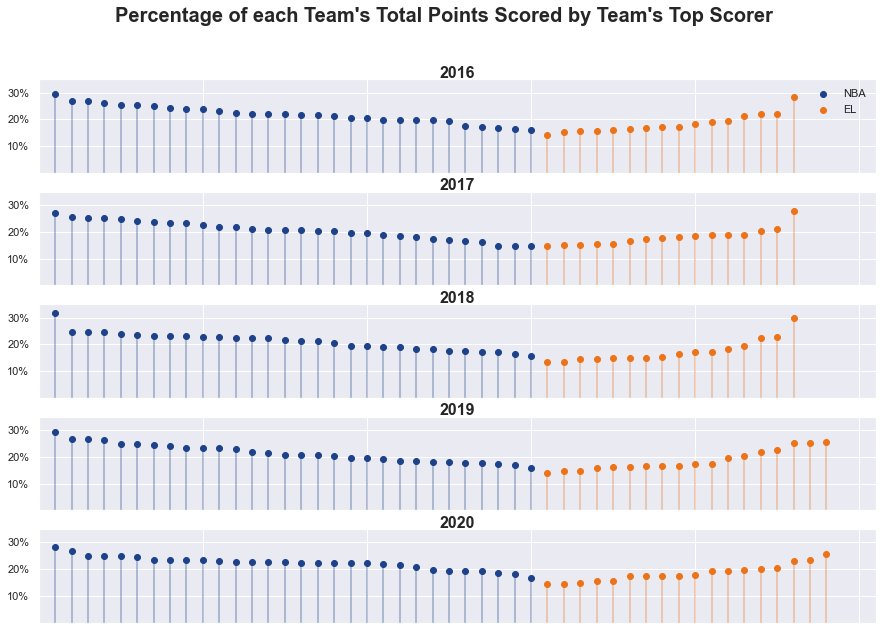

In [43]:
# Preliminary figure layout
fig, axs = plt.subplots(5, 1, figsize=(15, 10))
row_range = range(0, len(years))

# Plot the data for each year using lollipop plots
for (year, index) in zip(years, row_range):
    
    # Get the segment for the current year
    df = teams_and_scorer[teams_and_scorer["Year"] == year]
    
    # Get the NBA segment in descending order
    NBA_values = df.loc[df["League"] == "NBA", "Top Scorer PTS%"].sort_values(ascending = False)
    # Draw all the NBA stems
    _ = axs[index].vlines(x = range(1, len(NBA_values) + 1), ymin=0, ymax=NBA_values,
                          color=NBA_blue, alpha=0.4)
    # Draw all the NBA heads
    _ = axs[index].scatter(x = range(1, len(NBA_values) + 1), y = NBA_values,
                           color=NBA_blue, alpha=1, label = "NBA",)
    
    # Get EL segment in ascending order
    EL_values = df.loc[df["League"] == "EL", "Top Scorer PTS%"].sort_values(ascending = True)
    # Draw all the EL stems
    _ = axs[index].vlines(x= range(len(NBA_values) + 1, (len(NBA_values)+1) + len(EL_values)), ymin=0, ymax=EL_values,
                   color=EL_orange, alpha=0.4)
    # Draw all the EL heads
    _ = axs[index].scatter(x = range(len(NBA_values) + 1, (len(NBA_values)+1) + len(EL_values)), y = EL_values,
                   color=EL_orange, alpha=1, label = "EL")
    
    # general layout
    _ = axs[index].set(xlim = (0, 51), ylim = (0, 35), xticklabels = "", ylabel = "",
                      yticks = [0, 10, 20, 30], yticklabels = ["", "10%", "20%", "30%"])
    
    # Draw the legend on the right of the first plot
    if index == 0:
        _ = axs[index].legend(fontsize = 11)
    
    # Title each plot
    _= axs[index].set_title(year, fontsize = 16, pad = 1.5)

# Title the entire figure    
_ = fig.suptitle("Percentage of each Team's Total Points Scored by Team's Top Scorer",
                        fontsize = 20)    

The difference in the heights of the lollipops is evident: for any of the years we consider, roughly 80% of the blue lollipops stands taller than 75% of the orange ones. This numbers fully validate our hypothesis. **We** can therefore **conclude that, in the NBA, the offensive game relies heavily on the ability of a single (or a handful) of star players which carry most of the points load; in the EL, instead, this individual load is milder and therefore the team's points production must be more evenly shared among team members.**

## Analyzing Teams' Statistical Data

### Comparing Teams' Points and Winning Percentage Distributions

We now turn our attention, as promised, to the teams' stats distributions. Let's start with Points and let's see if the curves we obtain reflect what we observed using the players' data. 

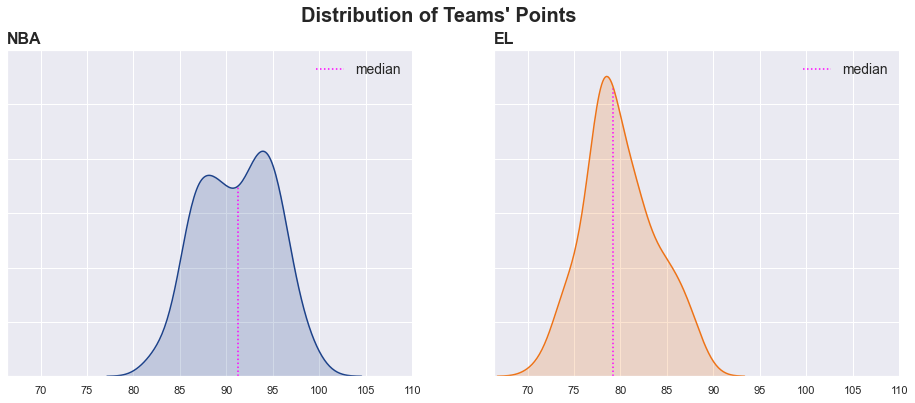

In [44]:
# preliminary figure settings
fig, axs = plt.subplots(1, 2, figsize = (16, 6))

# Draw the points distributions side by side
NBA_plot = draw_kde(axs[0], "NBA", "PTS", "teams")
EL_plot = draw_kde(axs[1], "EL", "PTS", "teams")

# Remove axis labels, uniformize axis limits to facilitate comparison and draw the legend
for ax in axs:
    ax.set(xlabel = "", ylabel = "", yticklabels = [], xlim = ((teams["PTS"].min() - 5, teams["PTS"].max() + 10)),
           ylim = (0, 0.12));
    ax.legend(fontsize = 14)

# Set the title of each subplot    
NBA_plot.set_title("NBA", fontsize = 16, loc = "left");
EL_plot.set_title("EL", fontsize = 16, loc = "left");

# Set the tile of the entire figure
fig.suptitle("Distribution of Teams' Points", fontsize = 20);

Altough the two distributions have roughly equal ranges, the blue curve accumulates to the right of the orange curve. In fact, the NBA median is more than 10 points higher than the EL median. This exposes even more significantly what we observed with the players' data. Hence, **we can confidently say that teams in the NBA score more points than teams in the EL**. We will soon try to investigate the possible reasons that cause this distinction.

Commenting a little bit on the shape of the two curves, we can say that the NBA distribution looks bimodal, with one tallest peak around 94 points and the other one at 88 points. It's reasonable to believe that these peaks distinguish "bad" teams from "good" teams or, similarly, teams with losing records from teams with winning records. On the other hand, the plot on the right only shows one distinctive peak so it is harder to make the same distinction.  

Since we do have the teams' Winning Percentages available, let's graph their distribution for each league and see how they compare with the pictures above.

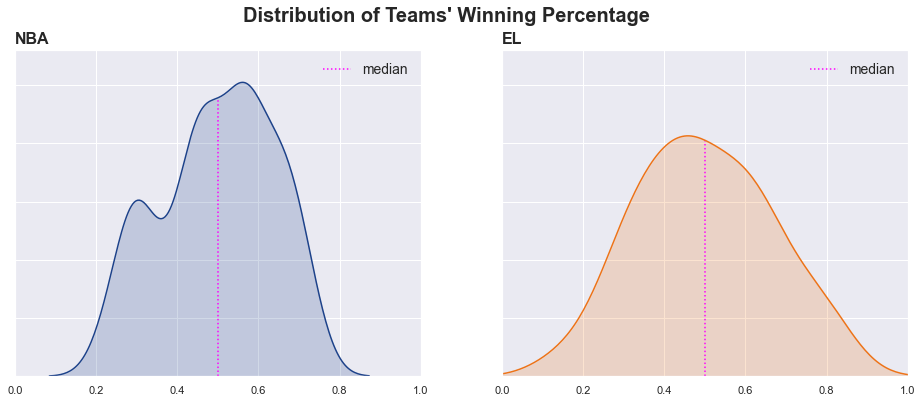

In [45]:
# preliminary figure settings
fig, axs = plt.subplots(1, 2, figsize = (16, 6))

# Draw the winning percentages distributions side by side
NBA_plot = draw_kde(axs[0], "NBA", "W/L%", "teams")
EL_plot = draw_kde(axs[1], "EL", "W/L%", "teams")

# Remove axis labels, uniformize x-axis limits to facilitate comparison and draw the legend
for ax in axs:
    ax.set(xlabel = "", ylabel = "", yticklabels = [], xlim = (0, 1), ylim = (0, 2.8))   
    ax.legend(fontsize = 14)

# Set the title of each subplot    
NBA_plot.set_title("NBA", fontsize = 16, loc = "left")
EL_plot.set_title("EL", fontsize = 16, loc = "left")

# Set the tile of the entire figure
fig.suptitle("Distribution of Teams' Winning Percentage", fontsize = 20);

In the blue curve above we recognize the same two peaks that appeared in the NBA teams' Points ditribution. We can use these peaks to **separate between a smaller group of subpar NBA teams with winning records around .300 and better teams which pass the break-even .500 mark; in the EL, instead, Winning Percentages are normally distributed and it's harder to pick out a batch of particularly bad teams**.

This uneven scenario is most likely a consequence of the leagues' different format: the NBA consists of 30 teams so, despite the efforts to keep a plain level field with systems like the [Draft Lottery](https://franchisesports.co.uk/nba-draft-lottery-explained/), it is inevitable to have a group of weak teams which struggles every year; moreover the NBA has a closed system, which means that bad teams are not replaced if they do poorly. Only 16 teams participate to the EL instead (18 starting from the 2019-2020 season) and, besides the 11 teams which possess a multi-year license, the rest of the spots is reassigned each season, making it possible to keep a high level of competition among all participants.        

### Comparing Teams' Shooting Stats

In this section we want to visualize those stats which we have disregarded when working with the players' data, that is, the stats describing shooting production. One advantage of doing this now, using the teams' information, is that we don't have to filter out for players with irrelevant values (for instance, remember that players with no 3-point attempts are deviously reported as having a zero 3-point shooting percentage). 

Unlike what we've done so far, this time we draw the distributions of both leagues on the same axis and, to make the picture less crowded, we get rid of the vertical lines denoting medians.

In [46]:
# Select the stats to plot
stats = ["FGA", "FG%", "2PA", "2P%", "3PA", "3P%", "FTA", "FT%",]

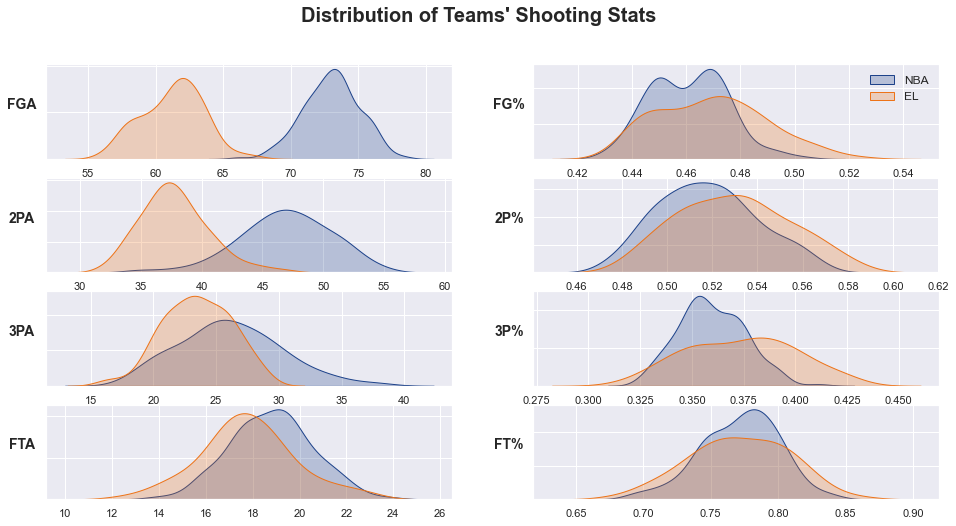

In [47]:
# preliminary figure setting
fig, axs = plt.subplots(4, 2, figsize = (16, 8))

for (stat, ax) in zip(stats, axs.ravel()):

    # Plot the stat distribution for each league
    NBA_plot = sns.kdeplot(data = NBA_teams, x = stat, color = NBA_blue, ax = ax, shade = True, label = "NBA")
    EL_plot = sns.kdeplot(data = EL_teams, x = stat, color = EL_orange, ax = ax, shade = True, label = "EL")

    # general layout
    _ = ax.set_ylabel(stat, rotation = 0, fontsize = 14, weight = "bold", labelpad = 15)
    _ = ax.set(xlabel = "", yticklabels = [])   
     
# Draw the legend on the second plot (at the end of the first row)
_ = axs[0][1].legend(fontsize = 12)
        
# Set the title of the figure        
_ = fig.suptitle("Distribution of Teams' Shooting Stats", fontsize = 20)

A quick glance at the picture immediately reveals that, regardless of the shot type, **teams in the NBA attempt more shots but have lower accuracy than teams in the EL**. In particular, the NBA distribution of Field Goal and 2-Point Shot Attempts are almost entirely shifted to the right of the EL distribution and have medians which are larger by about 10 attempts.

We also observe a disparity in the number of 3-point shots: the EL curve is centered around 23 attempts while the NBA one is centered at 26. But the differences between the data are sharper than what these numbers suggest; in fact, the NBA distribution is more spread and its tail extends well beyond the EL maximum.

**This imbalance in the number of shot attempts can be used to justify the discrepancy in teams' Points that we observed earlier**. In fact, logic suggests that the more shots you attempt, the more you make, the more points you score (we already resorted to this syllogism to comment on [this graph](#the_graph)).

In order to obtain one last explicit confirmation of what we have just described, let's also plot the columns describing shots made.

In [48]:
# Select the stats to plot
stats = ["FGM", "2PM", "3PM", "FTM"]

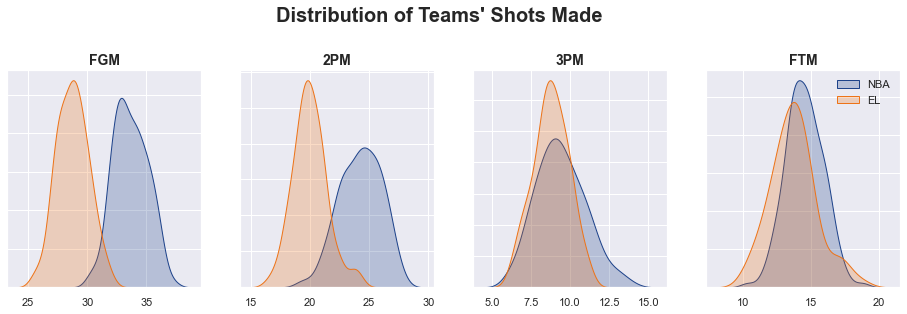

In [49]:
# preliminary figure setting
fig, axs = plt.subplots(1, 4, figsize = (16, 4))

for (stat, ax) in zip(stats, axs.ravel()):

    # Plot the stat distribution for each league
    NBA_plot = sns.kdeplot(data = NBA_teams, x = stat, color = NBA_blue, ax = ax, shade = True, label = "NBA")
    EL_plot = sns.kdeplot(data = EL_teams, x = stat, color = EL_orange, ax = ax, shade = True, label = "EL")

    # general layout
    _ = ax.set(xlabel = "", ylabel = "", yticklabels = [])   
    _ = ax.set_title(stat, fontsize = 14)
        
# Draw the legend on the last plot
_ = axs[3].legend()
        
# Set the title of the figure        
_ = fig.suptitle("Distribution of Teams' Shots Made", fontsize = 20, y = 1.1)

As expected, more shots are made in the NBA than in the EL. We can therefore safely conclude that **NBA teams tend to score  more points than EL teams because they attempt more shots during a game**.

### Comparing the Evolution of Teams' 3-Point Shot Attempts through the Years

The lower 3-point shooting percentages that are registered in the NBA can be given a very logical explanation: **on an NBA court the 3-point line is further from the basket than it is in the EL** (for exact measuraments the reader can refer to the link we included in [this cell](#the_cell2)). **This makes it harder to sink shots and consequently the percentages are affected**.

Considering what we just said, however, **it is hard to make sense of why teams in the NBA also tend to take more 3-point shots than teams in the EL**. In an effort to shed some light on this issue, let's see how the average number of teams' 3-point shot attempts has evolved throughout the years in each of the leagues.

In [50]:
# Collect the average number of 3-point attempts per league and per year 
average_3PA = teams.groupby(["League", "Year"]).mean()["3PA"].round().reset_index()

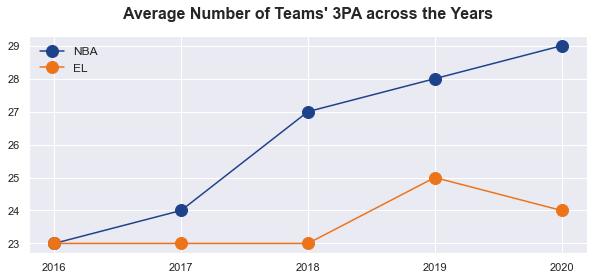

In [51]:
# preliminary figure settings
fig = plt.figure(figsize = (10, 4))

# Draw the plots separately so that dots will appear in the legend's handles (it doesn't happen in seaborn)
NBA_plot = plt.plot("Year", "3PA", data = average_3PA[average_3PA["League"] == "NBA"], marker = "o",
                    markersize = 12, color = NBA_blue, label = "NBA")
EL_plot = plt.plot("Year", "3PA", data = average_3PA[average_3PA["League"] == "EL"], marker = "o",
                   markersize = 12, color = EL_orange, label = "EL")

# general layout
_ = plt.ylabel("")
_ = plt.xlabel("")
_ = plt.xticks(years)

# Draw the legend
legend = plt.legend(fontsize = 12)

# Make the title (I manually center it as best as possible using the "x" parameter)
_ = fig.suptitle("Average Number of Teams' 3PA across the Years", fontsize = 16, x = 0.513)

NBA and EL teams started with the same average number of 3-point attempts in the 2016-2017 season. Since then, however, this number has steadily kept growing in the NBA while it hasn't changed as much in the EL.

Looking around the internet, [one can learn](https://shottracker.com/articles/the-3-point-revolution) how this increase in 3-point shots has actually been happening in the NBA for over two decades (one note of caution for comparing the graph above with the one in the linked article: remember our stats are normalized to 40 minutes). In fact, some people believe that this surge has ruined the game and suggestions have been made to modify the rules in order to [lessen the impact](https://www.espn.com/nba/story/_/id/26633540/the-nba-obsessed-3s-let-fix-thing) of 3-point shots.  

Even if it's still unclear why the EL hasn't matched the NBA's increase in 3-point shooting, this information justifies at least the shapes of the teams' 3-Point Shots distributions. Moreover, this trend could also possibly explain why the NBA players' median height and weight have decreased in the last couple years (which we observed [here](#the_graph2) and [here](#the_graph3)). In fact, the classical prototype of 3-point shooter is a small and agile player.

### Visualizing Correlations between Teams' Stats

In an effort to uncover possible differences between the playing styles in the NBA and in the EL, we have already inspected the correlation between Points and other statistical columns of the `players` DataFrame. We do the same, yet on a larger scale, here. We are particularly interested in the correlation between the teams' Winning Percentages and the rest of the stats; in fact, this could help us identify aspects of the game that have high influence on teams' performances. 

In the plot below, the numbers appearing inside the dots in the upper half of the grid represent the correlation coefficients between the two intersecting stats. (NOTE: the `corrdot()` function defined below is inspired by <a href="https://stackoverflow.com/questions/48139899/correlation-matrix-plot-with-coefficients-on-one-side-scatterplots-on-another#answer-50690729">this</a> Stack Overflow answer). As usual, we use blue for the NBA data and orange for the EL data. 

In [52]:
# Select the stats to plot
cols = ["TRB", "AST", "STL", "PTS", "League", "W/L%"]

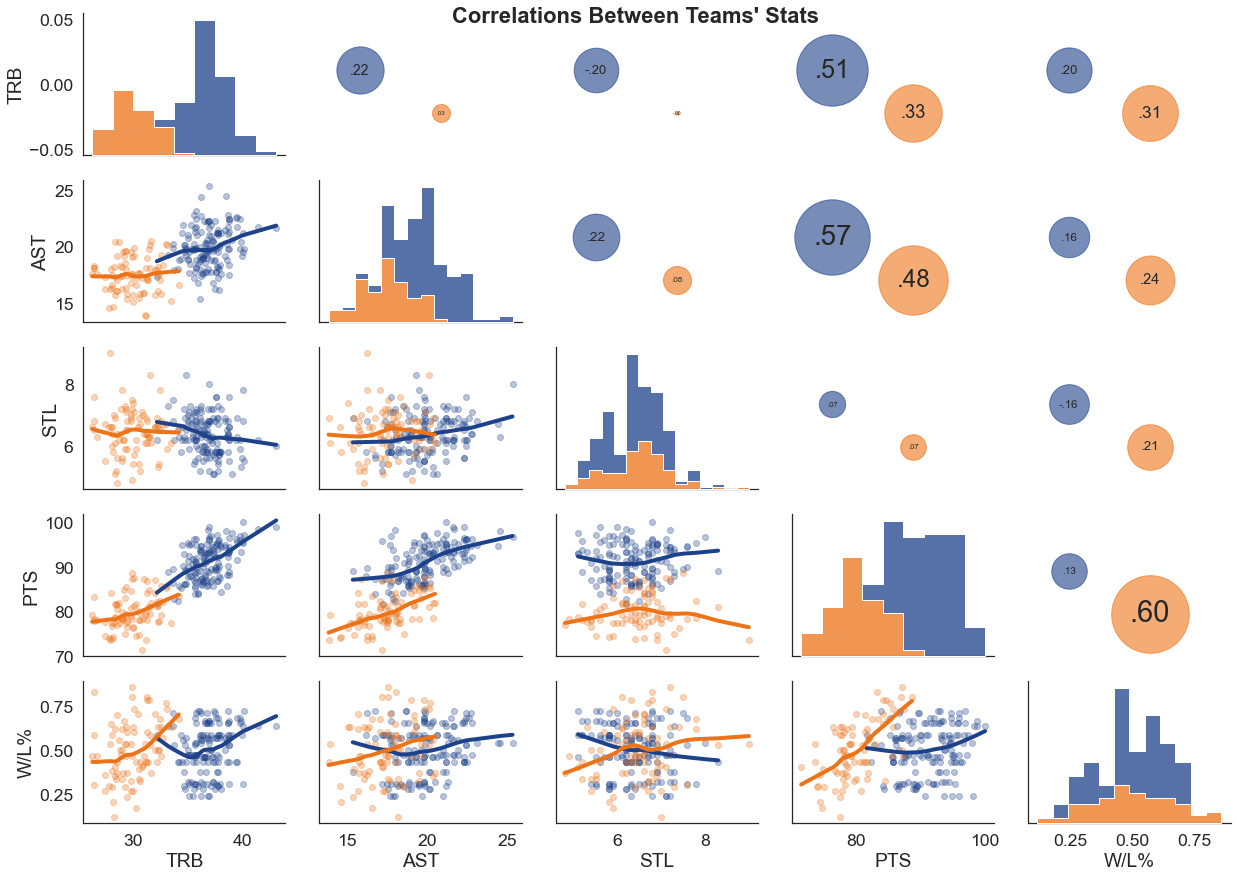

In [53]:
def corrdot(*args, **kwargs):
    """
    Calculate correlation coefficient between two columns of a DataFrame and draw it inside a dot of size proportional
    to the magnitude of the coefficient. This dot is placed either at the top left or bottom right corner of the axis.
    This function is designed  to distinguish between NBA and EL data and change the customization accordingly. 
    """
    # Calculate the correlation coefficient and format it for rendering
    corr_r = args[0].corr(args[1], "pearson")
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    
    # Set up a handy axis coordinate system
    ax = plt.gca()
    ax.set_axis_off()
    
    # Make the size of the dot proportional to the magnitude of the correlation coefficient
    marker_size = abs(corr_r) * 10000
    
    # If we are drawing NBA data place the dot at the top left corner and use the blue color
    if kwargs["label"] == "NBA":
        NBA_plot = ax.scatter([.2], [.6], marker_size, NBA_blue, alpha=0.6,
                   transform=ax.transAxes)
        font_size = abs(corr_r) * 40 + 5
        ax.annotate(corr_text, [.2, .6,],  xycoords="axes fraction",
                    ha="center", va="center", fontsize=font_size)
    
    # If we are drawing EL data place the dot at the bottom right corner and use the orange color    
    else:
        EL_plot = ax.scatter([.6], [.3], marker_size, EL_orange, alpha=0.6,
                   transform=ax.transAxes)
        font_size = abs(corr_r) * 40 + 5
        ax.annotate(corr_text, [.6, .3,],  xycoords="axes fraction",
                    ha="center", va="center", fontsize=font_size)
    return   

# general appereance
sns.set(style="white", font_scale=1.6)

# Initialize a PairGrid object to compare stats pairwise across the leagues
g = sns.PairGrid(teams[cols], aspect=1.4, hue = "League", diag_sharey=False, palette = league_colors)

# Draw regression plots with locally weighted smoothing in the bottom half of the grid 
lower_corner = g.map_lower(sns.regplot, lowess = True, scatter_kws = {"alpha": 0.3}, line_kws = {"lw": 4})

# Draw stacked histograms on the diagonal 
diagonal = g.map_diag(sns.histplot, multiple = "stack", element = "step")

# Draw correlation coefficients in the upper half of the grid 
upper_corner = g.map_upper(corrdot)

# Make the title
title = upper_corner.fig.suptitle("Correlations Between Teams' Stats", fontsize = 22)

We focus on the last column of the grid and we notice the stat which shows the strongest correlation with Winning Percentages is Points. This observation, however, only pertains to EL data while the same correlation coefficient for the NBA is very irrelevant.  We can explore this issue further by looking at the corresponding scatterplot (the rightmost one on the last row): indeed it does seem like **EL teams which score more points tend to have better winning records; on the contrary, the NBA data is much more sparse**.

We have already analyzed at length both the players' and the teams' distributions of Points, hence we feel like we can give a good explanation for what we have just observed: **since the NBA has a higher density of top scorers, offensive talent is generally more common and pervasive; consequently, scoring a lot of points might not be enough for a team to secure plenty of wins**.

Unfortunately, none of the other stats correlates strongly to Winning Percentages and the remaining scatterplots on the last row do not offer much insight. This proves once again that it's hard to create a winning strategy which focuses on a single aspect of the game and, instead, teams must display a combination of different skills in order to be successful.

Considering all columns at once, we do notice a mild positive correlation between Points and Assists. This is fairly logical since an assist naturally leads to a made shot.  

Lastly, looking at the stacked histograms on the diagonal, it's apparent that **teams in the NBA catch more rebounds and dish more assists than teams in the EL**. The result for the Assists is particularly meaningful since it didn't show up as neatly when we used players' stats; it is most likely a direct consequence of the fact that teams in the NBA attempt (and make) more shots.

### Assessing the Impact of Defense

We are approaching the end of our analysis but there's still one issue we want to make sure to cover. Arguably, the clearest piece of knowledge we acquired throughout this notebook is that teams in the NBA score more points than teams in the EL. We were able to link this back to the fact that teams in the NBA attempt more field goals than teams in the EL. However, it is still not clear what causes this imbalance in shot attempts.

To find a possible explanation, we try to asses an aspect of the game that we have mostly disregarded so far: the impact of defensive plays. In particular, we will try to see if the higher number of field goal attempts (hence of points) is a consequence of the fact that defenses in the NBA are less smothering than in the EL.  

We execute our plan by looking at the distribution of the `TOV` column. This represents Turnovers, which is what happens when a team loses possession of the ball because of some error or foul play (for example, a bad pass or a shot clock violation). Forcing a turnover is usually a sign the defense played well and put pressure on the attacking team. Hence, we use this stat as a measure of teams' defensive strength.    

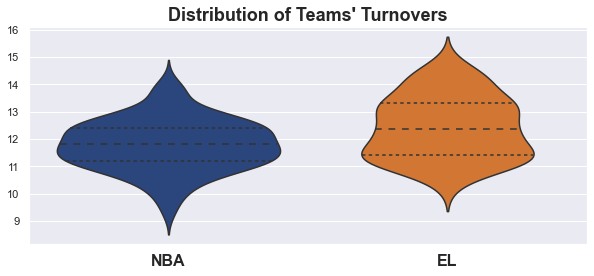

In [54]:
# preliminary figure settings
sns.set(style = "darkgrid", font_scale=1)
fig = plt.figure(figsize = (10, 4))

# Plot distributions using violinplots
plot = sns.violinplot(data = teams, x = "League", y = "TOV", inner = "quart", palette = league_colors)

# general layout
_ = plot.set(xlabel = "", ylabel = "")
_ = plt.xticks(fontsize = 16, weight = "bold")

# Make title
_ = plt.title("Distribution of Teams' Turnovers", fontsize = 18)

We notice that the quartiles of the EL distributions are generally higher and further apart than the NBA ones. Moreover, the blue violin is only wide within the inter-quartile range, while the orange curve still shows a considerable density around and above the upper quartile.

Even if this is probably not enough evidence to jump to conclusions, **the picture above possibly suggests that the defensive game is more developed and curated in the EL than in the NBA**.

---

# Conclusion

In this project we scraped, cleaned and analyzed data referring to players and teams who played in the NBA or Euroleague (EL) between 2016 and 2020. By visualizing and comparing the distributions of both the biographical and statistical information in our possession, we discovered that:

- Most of the players in both leagues come from the USA. Among the other popular countries, we find Canada and Australia in the NBA and, in the EL, a group of four-five European nations led by France. In fact, when considered as a single group, European players in the EL outnumber Americans.    
- Players in the NBA are overall younger than the ones in the EL. More specifically, roughly half of the NBA players are younger than 26 while in the EL this threshold increases to 29 years old.
- Players in the NBA are on average a few kilos heavier than the ones in the EL. There's not much difference between the heights of players in the two leagues. However, starting from 2019, the median weight and height of NBA players have decreased slightly.  
- The NBA has a much higher density of top scorers, which is to say, players who score a lot of points (at least 25 points per 40-minutes). As a consequence, the points production of NBA teams is mostly based on the skills of a handful of offensively talented players, while in the EL teams' points are more uniformly distributed among all the team members.
- In the NBA it is easier to pinpoint a small group of bad teams with losing records while in the EL Winning Percentages are normally distributed. This might have to do with the different format of the two leagues.    
- Teams in the NBA score about 10 more Points than teams in the EL but at the same time attempt at least 10 more Field Goals per 40-minutes. One of the factors that causes this imbalance is that the average number of NBA teams' 3-Point Attempts has grown steadily over the period of time we are considering. This last observation could also explain the heights' and weights' trends we mentioned above.  
- As a consequence of the higher number of Field Goal Attempts (hence of both shots made and missed), NBA teams tend to have more Rebounds and more Assists than teams in the EL. 
- Teams' Winning Percentages in the EL are positively correlated with Points. This means that teams which score a lot of points tend to win more games. In the NBA, because of the higher density of top scorers, this assumption fails to be valid.
- Teams in the EL make more Turnovers than teams in the NBA. This could possibly be a sign that defenses in the EL are more smothering. Such assumption would also explain the higher number of Field Goal Attempts (and Points) in the NBA.   

# Next Steps

The insights we listed above look valid and interesting. However, considering how round-up and versatile the game of basketball is, there's surely still a lot to uncover. Here are some possible extra steps that could unlock new knowledge:

- Use more advanced stats (this will most likely yield new results but will also require higher domain knowledge). 
- Look at data spanning a longer time period than what we considered.
- Compare players' stats looking at every role separately and see if there's any evident discrepancy among players playing in a particular position.
- Collect different data describing the teams' defensive efficiency and see if we can conclude that defenses are stronger in one league rather than the other (at the end of this project we analyzed Turnovers and conjectured that defenses are better in the EL than in the NBA). 
- Use machine learning to create a model that can predict the winning record of a team using its season stats (this might require something more sophisticated than linear regression or, at least, working with advanced stats since, as of now, the `W/L%` column doesn't show any particularly strong correlation with the rest of the data).